# Importing Modules and Libraries

In [6]:
# Import Pandas
import pandas as pd

# Import MatPlot lib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

# Import seaborn
import seaborn as sns

# Import NumPy
import numpy as np

# Data Loading

In [7]:
data = pd.read_csv(r"C:\Users\ricar\Documents\Career\UK\Birkbeck - Data Science MSc\Year 2\Project\Databases\Impersonation & Bondora Copy\LoanData_Bondora.csv", low_memory=False)

Visualise top rows

In [5]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
3,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0,385.0,BO76151K3,True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+
4,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0,785.0,BOK423A63,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,180+


# Aggregate Measures

### Number of datapoints and dimensions

In [8]:
data.shape

(179235, 112)

### Analysing original data types

In [243]:
data.dtypes.value_counts()

float64    62
object     35
int64      12
bool        3
dtype: int64

### Analysing missing datapoints

% missing for each variable

In [5]:
pd.options.display.max_rows = 150

null_perc = data.isnull().sum()/len(data)

null_perc = pd.DataFrame(null_perc).reset_index()
null_perc.columns = ['Variable', '% Missing']
null_perc

,Variable,% Missing
0,ReportAsOfEOD,0.000000
1,LoanId,0.000000
2,LoanNumber,0.000000
3,ListedOnUTC,0.000000
4,BiddingStartedOn,0.000000
5,BidsPortfolioManager,0.000000
6,BidsApi,0.000000
7,BidsManual,0.000000
8,UserName,0.000000
9,NewCreditCustomer,0.000000


Show variables with more than 50% missing

In [8]:
null_perc_50 = null_perc[null_perc['% Missing'] > 0.5].sort_values(['% Missing'], ascending=False)
null_perc_50

,Variable,% Missing
21,DateOfBirth,1.000000
29,County,1.000000
30,City,1.000000
37,EmploymentPosition,1.000000
80,Rating_V0,0.974508
79,EL_V0,0.974508
89,CreditScoreEsEquifaxRisk,0.931827
82,Rating_V1,0.927894
81,EL_V1,0.927894
83,Rating_V2,0.859720


In [9]:
print(len(null_perc_50))

36


Text(0.5, 1.0, 'Variables with more than 50% missing')

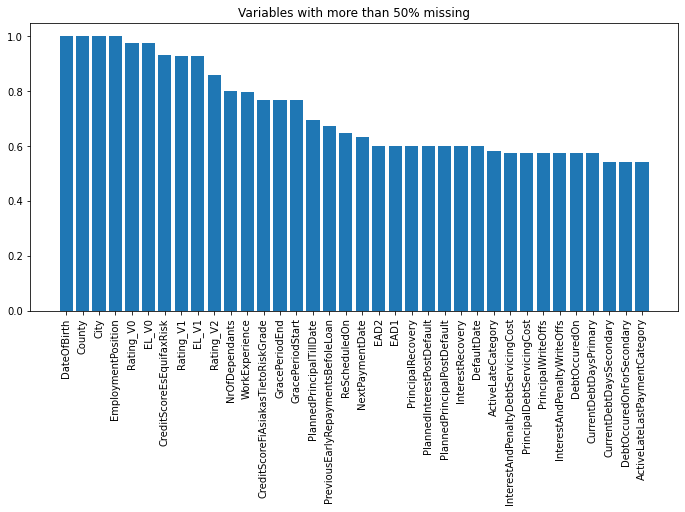

In [233]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])

ax.bar(null_perc_50["Variable"], null_perc_50["% Missing"])
plt.xticks(rotation=90)
plt.title("Variables with more than 50% missing")

# Detailed Analysis

### Selecting key variables

In [235]:
data_key = data[['NewCreditCustomer', 'LoanDate', 'Age', 'Gender', 'Country', 'Amount',
                 'LoanDuration', 'MonthlyPayment', 'Education', 'EmploymentStatus',
                 'HomeOwnershipType', 'IncomeTotal', 'DebtToIncome', 'Status']]
data_key

,NewCreditCustomer,LoanDate,Age,Gender,Country,Amount,LoanDuration,MonthlyPayment,Education,EmploymentStatus,HomeOwnershipType,IncomeTotal,DebtToIncome,Status
0,False,2016-03-23,53,1.0,EE,2125.0,60,62.05,4.0,6.0,1.0,354.0,26.29,Late
1,False,2015-06-25,50,1.0,EE,3000.0,60,84.75,5.0,5.0,1.0,900.0,30.58,Late
2,True,2016-01-19,44,0.0,EE,9100.0,60,268.57,4.0,5.0,8.0,1200.0,26.71,Repaid
3,True,2015-03-27,42,0.0,ES,1500.0,60,63.53,2.0,3.0,2.0,863.0,7.36,Late
4,True,2015-12-22,34,1.0,ES,1090.0,48,101.19,4.0,6.0,3.0,697.0,36.04,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,True,2015-03-02,38,1.0,FI,2000.0,60,76.11,3.0,3.0,3.0,2300.0,9.40,Late
179231,False,2016-02-18,37,0.0,FI,7440.0,60,232.40,4.0,3.0,4.0,2172.0,69.77,Repaid
179232,False,2016-02-10,37,0.0,ES,1485.0,60,93.08,3.0,3.0,8.0,1550.0,30.13,Repaid
179233,True,2015-08-17,58,1.0,EE,3000.0,60,88.71,3.0,3.0,1.0,350.0,25.35,Repaid


### Renaming values

In [236]:
data_key = data_key.replace(
    {"Gender": { 0.0 : 'Male', 1.0 : 'Woman', 2.0: 'unknown'}})
    
data_key = data_key.replace(
    {"Education": { 1.0 : 'Primary', 2.0 : 'Basic', 3.0: 'Vocational', 4.0:'Secondary', 5.0:'Higher',
                  -1.0 : "Other", 0.0 :  "Other"}})
    
data_key = data_key.replace(
    {"MaritalStatus": { 1.0 : 'Married', 2.0 : 'Cohabitant', 3.0: 'Single', 4.0: 'Divorced', 5.0: 'Widow'}})
    
data_key = data_key.replace(
    {"EmploymentStatus": { 1.0 : 'Unemployed', 2.0 : 'Partially employed', 3.0: 'Fully employed',
                          4.0 : 'Self-employed', 5.0 : 'Entrepreneur', 6.0 : 'Retiree',
                         -1.0 : "Unknown", 0.0 : "Unknown"}})
    
data_key = data_key.replace(
    {"HomeOwnershipType": { 0.0 : 'Homeless', 1.0 : 'Owner ', 2.0 : 'Living with parents',
                           3.0 : 'Tenant, pre-furnished property',
                           4.0: 'Tenant, unfurnished property ', 5.0: 'Council house', 6.0:'Joint tenant',
                           7.0:'Joint ownership',
                            8.0:'Mortgage', 9.0:'Owner with encumbrance', 10.0:'Other',
                          -1.0 : "Other"}})

data_key = data_key.replace(
    {"Country": { "EE" : 'Estonia', "ES" : 'Spain ', "FI" : 'Finland', "SK" : 'Slovakia'}})

data_key


,NewCreditCustomer,LoanDate,Age,Gender,Country,Amount,LoanDuration,MonthlyPayment,Education,EmploymentStatus,HomeOwnershipType,IncomeTotal,DebtToIncome,Status
0,False,2016-03-23,53,Woman,Estonia,2125.0,60,62.05,Secondary,Retiree,Owner,354.0,26.29,Late
1,False,2015-06-25,50,Woman,Estonia,3000.0,60,84.75,Higher,Entrepreneur,Owner,900.0,30.58,Late
2,True,2016-01-19,44,Male,Estonia,9100.0,60,268.57,Secondary,Entrepreneur,Mortgage,1200.0,26.71,Repaid
3,True,2015-03-27,42,Male,Spain,1500.0,60,63.53,Basic,Fully employed,Living with parents,863.0,7.36,Late
4,True,2015-12-22,34,Woman,Spain,1090.0,48,101.19,Secondary,Retiree,"Tenant, pre-furnished property",697.0,36.04,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,True,2015-03-02,38,Woman,Finland,2000.0,60,76.11,Vocational,Fully employed,"Tenant, pre-furnished property",2300.0,9.40,Late
179231,False,2016-02-18,37,Male,Finland,7440.0,60,232.40,Secondary,Fully employed,"Tenant, unfurnished property",2172.0,69.77,Repaid
179232,False,2016-02-10,37,Male,Spain,1485.0,60,93.08,Vocational,Fully employed,Mortgage,1550.0,30.13,Repaid
179233,True,2015-08-17,58,Woman,Estonia,3000.0,60,88.71,Vocational,Fully employed,Owner,350.0,25.35,Repaid


### Univariate Analysis

Basic Statistics

In [237]:
data_key.select_dtypes(['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,179235.0,40.389137,12.359547,0.00,31.00,39.00,49.00,77.00
Amount,179235.0,2543.473023,2182.064156,6.39,740.00,2125.00,3825.00,10632.00
LoanDuration,179235.0,47.324747,15.370251,1.00,36.00,60.00,60.00,60.00
MonthlyPayment,172545.0,112.899170,107.550798,0.00,32.85,90.89,151.77,2368.54
IncomeTotal,179235.0,1763.367686,8127.175901,0.00,874.00,1230.00,1900.00,1012019.00
DebtToIncome,179185.0,5.830897,14.481862,0.00,0.00,0.00,0.00,198.02


Charts and plots

> Continuous variables

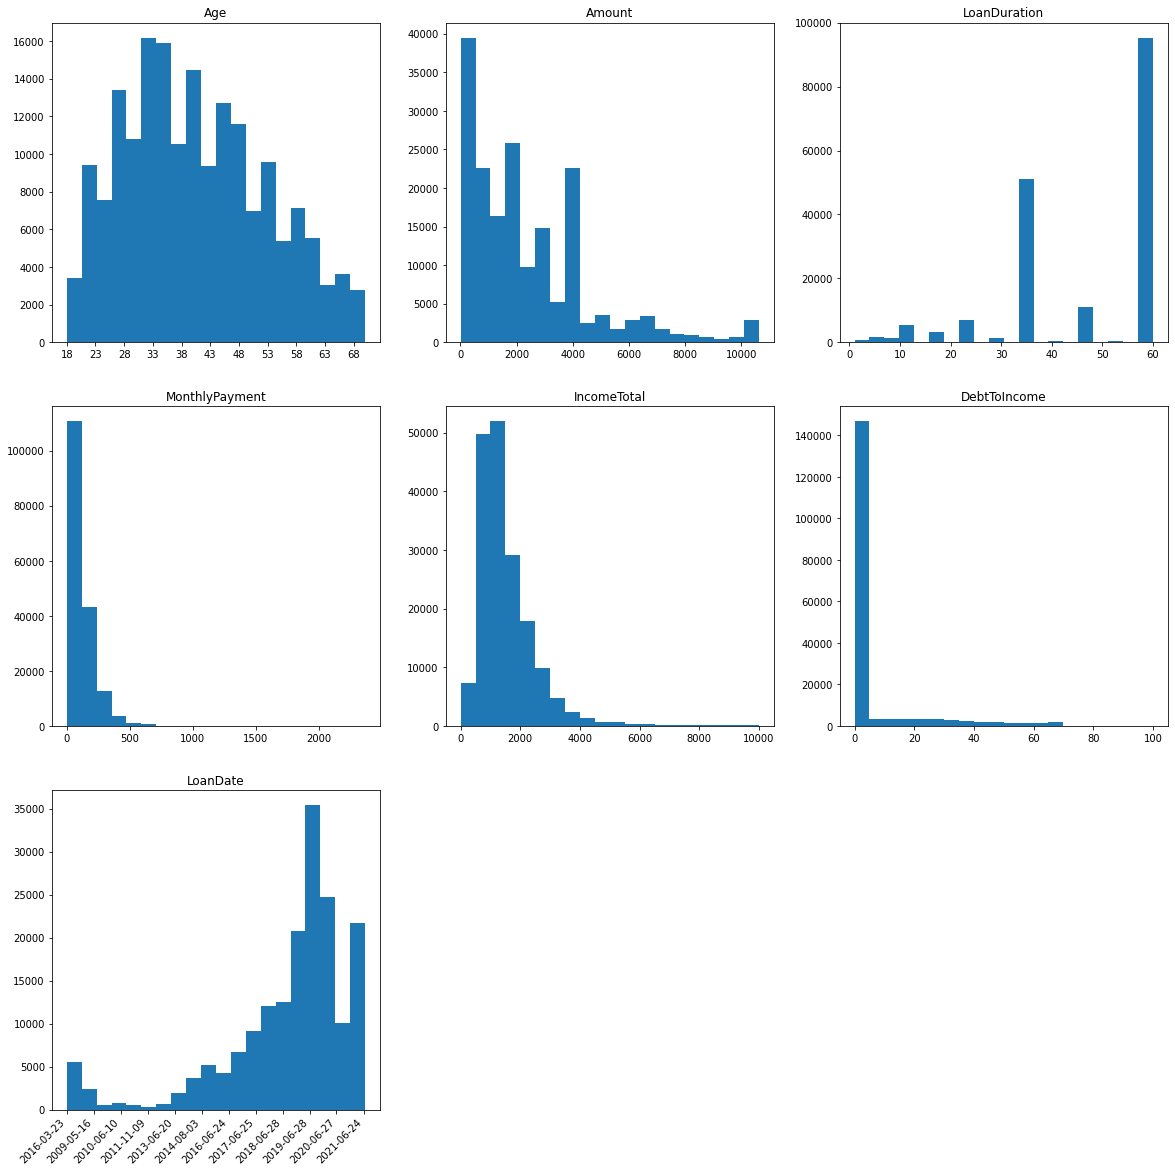

In [238]:
figure, axis = plt.subplots(3, 3, figsize=(20,20))

axis[0, 0].hist(data=data_key, x="Age", bins=20,  range=(18, 70))
axis[0, 0].set_title("Age")
axis[0, 0].xaxis.set_ticks(np.arange(18, 70, 5))

axis[0, 1].hist(data=data_key, x="Amount", bins=20)
axis[0, 1].set_title("Amount")

axis[0, 2].hist(data=data_key, x="LoanDuration", bins=20)
axis[0, 2].set_title("LoanDuration")

axis[1, 0].hist(data=data_key, x="MonthlyPayment", bins=20)
axis[1, 0].set_title("MonthlyPayment")

axis[1, 1].hist(data=data_key, x="IncomeTotal", bins=20, range=(0,10000))
axis[1, 1].set_title("IncomeTotal")

axis[1, 2].hist(data=data_key, x="DebtToIncome", bins=20, range=(0,100))
axis[1, 2].set_title("DebtToIncome")

axis[2, 0].hist(data=data_key, x="LoanDate", bins=20)
axis[2, 0].set_title("LoanDate")
axis[2, 0].xaxis.set_major_locator(mdates.YearLocator())
plt.setp(axis[2, 0].get_xticklabels(), rotation=45, ha='right')

axis[2, 1].remove()
axis[2, 2].remove()

plt.show()

> Categorical variables

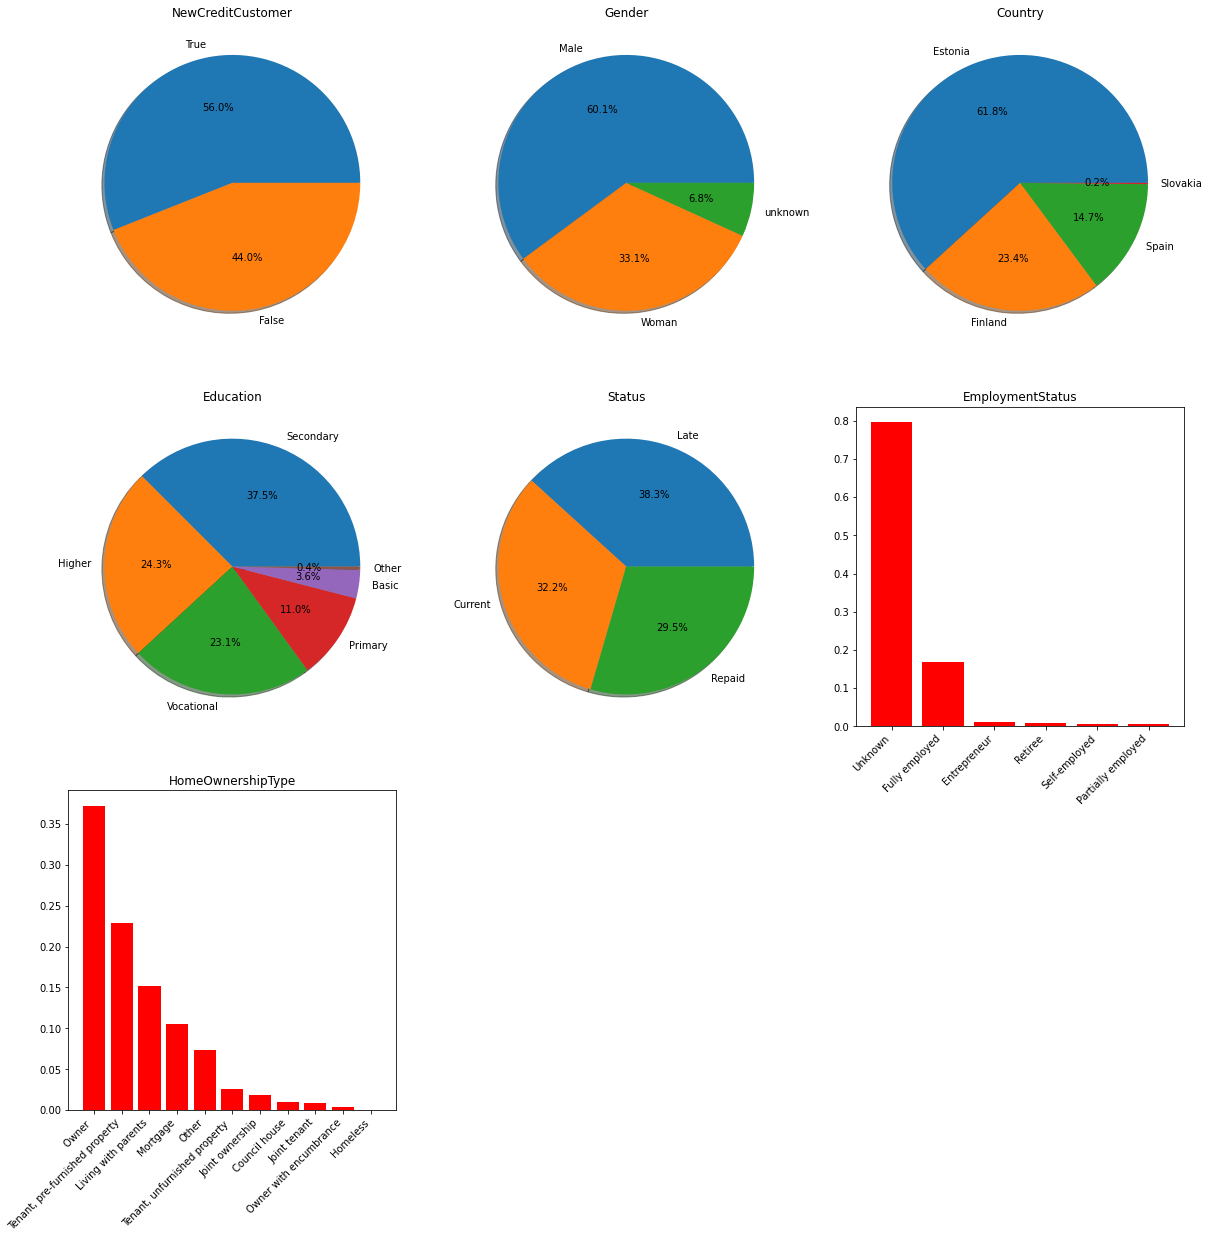

In [239]:
# NewCreditCustomer Gender Country Education EmploymentStatus HomeOwnershipType Status

def calc_percent(var):
    
    counts = data_key[var].value_counts()
    values = list(counts)
    labels = list(counts.index)
    
    
    percents = list()
    for value in values:
        pc = value/sum(values)
        percents.append(pc)
    return labels, values, percents


figure, axis = plt.subplots(3, 3, figsize=(20,20))

axis[0, 0].pie(calc_percent("NewCreditCustomer")[1], labels = calc_percent("NewCreditCustomer")[0], autopct='%1.1f%%', shadow=True,)
axis[0, 0].set_title("NewCreditCustomer")

axis[0, 1].pie(calc_percent("Gender")[1], labels = calc_percent("Gender")[0], autopct='%1.1f%%', shadow=True,)
axis[0, 1].set_title("Gender")

axis[0, 2].pie(calc_percent("Country")[1], labels = calc_percent("Country")[0], autopct='%1.1f%%', shadow=True,)
axis[0, 2].set_title("Country")

axis[1, 0].pie(calc_percent("Education")[1], labels = calc_percent("Education")[0], autopct='%1.1f%%', shadow=True,)
axis[1, 0].set_title("Education")

axis[1, 1].pie(calc_percent("Status")[1], labels = calc_percent("Status")[0], autopct='%1.1f%%', shadow=True,)
axis[1, 1].set_title("Status")

axis[1, 2].bar(calc_percent("EmploymentStatus")[0], calc_percent("EmploymentStatus")[2], color='r')
plt.setp(axis[1, 2].get_xticklabels(), rotation=45, ha='right')
axis[1, 2].set_title("EmploymentStatus")

axis[2, 0].bar(calc_percent("HomeOwnershipType")[0], calc_percent("HomeOwnershipType")[2], color='r')
plt.setp(axis[2, 0].get_xticklabels(), rotation=45, ha='right')
axis[2, 0].set_title("HomeOwnershipType")


axis[2, 1].remove()
axis[2, 2].remove()

plt.show()





### Multivariate Analysis

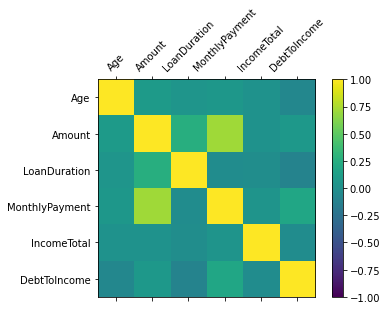

In [240]:
# Correlation Matrix Plot
# from matplotlib import pyplot
# from pandas import read_csv
# import numpy


correlations = data_key.select_dtypes(['number']).corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data_key.select_dtypes(['number']).columns)
ax.set_yticklabels(data_key.select_dtypes(['number']).columns)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [242]:
correlations.head(6)

,Age,Amount,LoanDuration,MonthlyPayment,IncomeTotal,DebtToIncome
Age,1.000000,0.087602,0.042823,0.056790,0.017880,-0.070362
Amount,0.087602,1.000000,0.257358,0.713649,0.020330,0.066078
LoanDuration,0.042823,0.257358,1.000000,-0.026689,-0.020105,-0.102598
MonthlyPayment,0.056790,0.713649,-0.026689,1.000000,0.037957,0.181105
IncomeTotal,0.017880,0.020330,-0.020105,0.037957,1.000000,-0.023492
DebtToIncome,-0.070362,0.066078,-0.102598,0.181105,-0.023492,1.000000
